# Stock Price Prediction of NABIL BANK

## Import the Required Libraries

In [106]:
import warnings
warnings.filterwarnings('ignore')

In [107]:
import pandas as pd
from keras import Sequential
from keras.layers import GRU, LSTM, SimpleRNN,  Dense, Dropout
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

## Load Data

In [108]:
nabil_df = pd.read_csv("data/nabil.csv")
nabil_df.shape

(2392, 8)

In [109]:
nabil_df.head()

,Symbol,Date,Open,High,Low,Close,Percent Change,Volume
0,NABIL,2022-07-12,796.0,804.9,787.0,796.9,0.62,42720
1,NABIL,2022-07-11,831.0,831.0,792.0,792.0,-4.12,69864
2,NABIL,2022-07-08,845.0,847.0,825.5,826.0,-2.25,30318
3,NABIL,2022-07-07,864.0,886.0,844.0,845.0,-2.20,51271
4,NABIL,2022-07-06,885.0,889.0,837.0,864.0,-0.92,58061


## Removing the Unwanted Columns 

In [110]:
nabil_df.drop(columns=['Symbol','Percent Change','Volume'],inplace=True)

In [111]:
nabil_df.head()

,Date,Open,High,Low,Close
0,2022-07-12,796.0,804.9,787.0,796.9
1,2022-07-11,831.0,831.0,792.0,792.0
2,2022-07-08,845.0,847.0,825.5,826.0
3,2022-07-07,864.0,886.0,844.0,845.0
4,2022-07-06,885.0,889.0,837.0,864.0


In [112]:
nabil_df.shape

(2392, 5)

Converting the Date into Panda's Date Time 

In [113]:
nabil_df['Date'] = pd.to_datetime(nabil_df['Date'])

## Sorting the Date by Date in Ascending Order

In [114]:
nabil_df=nabil_df.sort_values(by='Date')

## Setting Features and Target Column

In [115]:
features = ['Date','Close']

In [116]:
X = nabil_df[features]

In [117]:
X.set_index("Date",inplace=True)

## Splitting the Data Into Training, Validation and Test Set

In [118]:
X_train_split, X_test_split = train_test_split(X, train_size=0.8,shuffle=False)
X_test_split, X_valid_split = train_test_split(X_test_split, train_size=0.5,shuffle=False)

## Fucntion to slice data to Predict next day’s closing price by looking into previous 5 day’s data

In [119]:
def SliceData(data,step):     
    X,Y = [],[]
    for i in range(len(data)-step):
        X.append(data[i:(i+step),])
        Y.append(data[(i+step),])
    return np.array(X),np.array(Y)

## Normalizing the Data Using Standard Scalar

In [120]:
std_scalar = StandardScaler()
X_train = std_scalar.fit_transform(X_train_split)
X_valid = std_scalar.fit_transform(X_valid_split)
X_test = std_scalar.fit_transform(X_test_split)

## Getting the Sliced Data

In [121]:
steps = 5
X_train,y_train = SliceData(X_train,steps)
X_test,y_test = SliceData(X_test,steps)
X_valid,y_valid = SliceData(X_valid,steps)

## Building the RNN Model

In [122]:
RNN_Model = Sequential()
RNN_Model.add(SimpleRNN(50,input_shape=(steps,1),return_sequences=True ))
RNN_Model.add(Dropout(0.5))
RNN_Model.add(SimpleRNN(50))
RNN_Model.add(Dropout(0.5))
RNN_Model.add(Dense(50))
RNN_Model.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae'])

In [123]:
RNN_Model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 5, 50)             2600      
                                                                 
 dropout_10 (Dropout)        (None, 5, 50)             0         
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 50)                5050      
                                                                 
 dropout_11 (Dropout)        (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
Total params: 10,200
Trainable params: 10,200
Non-trainable params: 0
_________________________________________________________________


## Building LSTM Model

In [124]:
LSTM_Model = Sequential()
LSTM_Model.add(LSTM(50,input_shape=(steps,1),return_sequences=True ))
LSTM_Model.add(Dropout(0.5))
LSTM_Model.add(LSTM(50))
LSTM_Model.add(Dropout(0.5))
LSTM_Model.add(Dense(50))
LSTM_Model.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae'])

In [125]:
LSTM_Model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 50)             10400     
                                                                 
 dropout_12 (Dropout)        (None, 5, 50)             0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_13 (Dropout)        (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 50)                2550      
                                                                 
Total params: 33,150
Trainable params: 33,150
Non-trainable params: 0
_________________________________________________________________


## Fitting the RNN Model

In [126]:
RNN_History = RNN_Model.fit(X_train,y_train,epochs=100,batch_size = 50,validation_data=(X_valid,y_valid),shuffle=False, 
                    verbose = 2)

Epoch 1/100
39/39 - 2s - loss: 0.7526 - mae: 0.6569 - val_loss: 0.1520 - val_mae: 0.2931 - 2s/epoch - 55ms/step
Epoch 2/100
39/39 - 0s - loss: 0.3223 - mae: 0.4272 - val_loss: 0.0657 - val_mae: 0.1782 - 225ms/epoch - 6ms/step
Epoch 3/100
39/39 - 0s - loss: 0.2306 - mae: 0.3600 - val_loss: 0.0489 - val_mae: 0.1455 - 219ms/epoch - 6ms/step
Epoch 4/100
39/39 - 0s - loss: 0.1781 - mae: 0.3145 - val_loss: 0.0384 - val_mae: 0.1217 - 216ms/epoch - 6ms/step
Epoch 5/100
39/39 - 0s - loss: 0.1486 - mae: 0.2865 - val_loss: 0.0362 - val_mae: 0.1226 - 217ms/epoch - 6ms/step
Epoch 6/100
39/39 - 0s - loss: 0.1268 - mae: 0.2644 - val_loss: 0.0324 - val_mae: 0.1174 - 219ms/epoch - 6ms/step
Epoch 7/100
39/39 - 0s - loss: 0.1124 - mae: 0.2476 - val_loss: 0.0261 - val_mae: 0.1038 - 220ms/epoch - 6ms/step
Epoch 8/100
39/39 - 0s - loss: 0.0997 - mae: 0.2322 - val_loss: 0.0291 - val_mae: 0.1225 - 218ms/epoch - 6ms/step
Epoch 9/100
39/39 - 0s - loss: 0.0924 - mae: 0.2240 - val_loss: 0.0205 - val_mae: 0.0900 -

Epoch 73/100
39/39 - 0s - loss: 0.0412 - mae: 0.1482 - val_loss: 0.0217 - val_mae: 0.1115 - 213ms/epoch - 5ms/step
Epoch 74/100
39/39 - 0s - loss: 0.0381 - mae: 0.1416 - val_loss: 0.0187 - val_mae: 0.0982 - 210ms/epoch - 5ms/step
Epoch 75/100
39/39 - 0s - loss: 0.0370 - mae: 0.1428 - val_loss: 0.0213 - val_mae: 0.1099 - 214ms/epoch - 5ms/step
Epoch 76/100
39/39 - 0s - loss: 0.0405 - mae: 0.1488 - val_loss: 0.0226 - val_mae: 0.1163 - 208ms/epoch - 5ms/step
Epoch 77/100
39/39 - 0s - loss: 0.0392 - mae: 0.1458 - val_loss: 0.0212 - val_mae: 0.1103 - 212ms/epoch - 5ms/step
Epoch 78/100
39/39 - 0s - loss: 0.0404 - mae: 0.1465 - val_loss: 0.0177 - val_mae: 0.0944 - 214ms/epoch - 5ms/step
Epoch 79/100
39/39 - 0s - loss: 0.0402 - mae: 0.1482 - val_loss: 0.0198 - val_mae: 0.1018 - 208ms/epoch - 5ms/step
Epoch 80/100
39/39 - 0s - loss: 0.0413 - mae: 0.1476 - val_loss: 0.0223 - val_mae: 0.1140 - 208ms/epoch - 5ms/step
Epoch 81/100
39/39 - 0s - loss: 0.0391 - mae: 0.1459 - val_loss: 0.0225 - val_ma

In [127]:
LSTM_History = LSTM_Model.fit(X_train,y_train,epochs=100,batch_size = 50,validation_data=(X_valid,y_valid),shuffle=False, 
                    verbose = 2)

Epoch 1/100
39/39 - 5s - loss: 0.8346 - mae: 0.7923 - val_loss: 0.4397 - val_mae: 0.5781 - 5s/epoch - 125ms/step
Epoch 2/100
39/39 - 0s - loss: 0.2562 - mae: 0.3796 - val_loss: 0.0979 - val_mae: 0.2256 - 379ms/epoch - 10ms/step
Epoch 3/100
39/39 - 0s - loss: 0.1387 - mae: 0.2817 - val_loss: 0.0571 - val_mae: 0.1537 - 379ms/epoch - 10ms/step
Epoch 4/100
39/39 - 0s - loss: 0.1133 - mae: 0.2517 - val_loss: 0.0543 - val_mae: 0.1473 - 382ms/epoch - 10ms/step
Epoch 5/100
39/39 - 0s - loss: 0.0959 - mae: 0.2313 - val_loss: 0.0509 - val_mae: 0.1403 - 384ms/epoch - 10ms/step
Epoch 6/100
39/39 - 0s - loss: 0.0812 - mae: 0.2105 - val_loss: 0.0535 - val_mae: 0.1488 - 382ms/epoch - 10ms/step
Epoch 7/100
39/39 - 0s - loss: 0.0794 - mae: 0.2088 - val_loss: 0.0575 - val_mae: 0.1547 - 379ms/epoch - 10ms/step
Epoch 8/100
39/39 - 0s - loss: 0.0739 - mae: 0.2007 - val_loss: 0.0687 - val_mae: 0.1770 - 377ms/epoch - 10ms/step
Epoch 9/100
39/39 - 0s - loss: 0.0716 - mae: 0.1979 - val_loss: 0.0736 - val_mae: 

Epoch 72/100
39/39 - 0s - loss: 0.0417 - mae: 0.1493 - val_loss: 0.0529 - val_mae: 0.1616 - 366ms/epoch - 9ms/step
Epoch 73/100
39/39 - 0s - loss: 0.0443 - mae: 0.1570 - val_loss: 0.0547 - val_mae: 0.1728 - 366ms/epoch - 9ms/step
Epoch 74/100
39/39 - 0s - loss: 0.0439 - mae: 0.1568 - val_loss: 0.0574 - val_mae: 0.1763 - 355ms/epoch - 9ms/step
Epoch 75/100
39/39 - 0s - loss: 0.0443 - mae: 0.1586 - val_loss: 0.0640 - val_mae: 0.1874 - 355ms/epoch - 9ms/step
Epoch 76/100
39/39 - 0s - loss: 0.0446 - mae: 0.1567 - val_loss: 0.0487 - val_mae: 0.1642 - 356ms/epoch - 9ms/step
Epoch 77/100
39/39 - 0s - loss: 0.0425 - mae: 0.1527 - val_loss: 0.0368 - val_mae: 0.1359 - 357ms/epoch - 9ms/step
Epoch 78/100
39/39 - 0s - loss: 0.0406 - mae: 0.1482 - val_loss: 0.0341 - val_mae: 0.1249 - 362ms/epoch - 9ms/step
Epoch 79/100
39/39 - 0s - loss: 0.0379 - mae: 0.1421 - val_loss: 0.0355 - val_mae: 0.1270 - 458ms/epoch - 12ms/step
Epoch 80/100
39/39 - 0s - loss: 0.0383 - mae: 0.1407 - val_loss: 0.0322 - val_m

## Make Predictions

In [128]:
RNN_Predictions = RNN_Model.predict(X_test)
LSTM_predictions = LSTM_Model.predict(X_test)

## Inverse Transform the Values

In [129]:
RNN_act_prd = std_scalar.inverse_transform(RNN_Predictions)
LSTM_act_prd = std_scalar.inverse_transform(LSTM_predictions)

## Evalation Metrics (RMSE and MAE)

In [130]:
print("### RNN Model ###")
Y_test_res_RNN = std_scalar.inverse_transform(y_test)
pre_RNN = RNN_act_prd[:,:1]

rmse=np.sqrt(np.mean(((pre_RNN- Y_test_res_RNN)**2)))
print(f"RMSE {rmse}"  )

print(f"MAE {mean_absolute_error(Y_test_res_RNN, pre_RNN)}")

### RNN Model ###
RMSE 38.98487522765638
MAE 24.33409862029247


In [131]:
print("### LSTM Model ###")
Y_test_res_LSTM = std_scalar.inverse_transform(y_test)
pre_LSTM = LSTM_act_prd[:,:1]

rmse=np.sqrt(np.mean(((pre_LSTM- Y_test_res_LSTM)**2)))
print(f"RMSE {rmse}"  )

print(f"MAE {mean_absolute_error(Y_test_res_LSTM, pre_LSTM)}")

### LSTM Model ###
RMSE 46.422508767438416
MAE 30.296848655765892


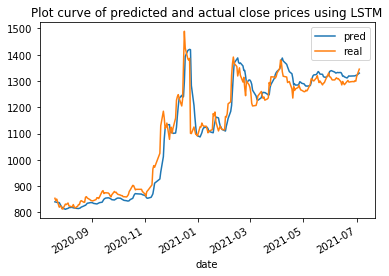

In [136]:
plot =pd.DataFrame()
plot["pred"]=list(map(float, pre_LSTM))
plot["real"]=list(map(float, Y_test_res_LSTM))
plot["date"]=X_test_split.index[:-steps]
plot.plot(kind="line", x="date", title="Plot curve of predicted and actual close prices using LSTM")
plt.show()

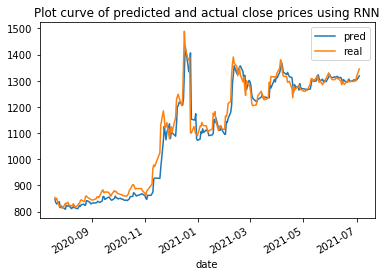

In [137]:
plot =pd.DataFrame()
plot["pred"]=list(map(float, pre_RNN))
plot["real"]=list(map(float, Y_test_res_RNN))
plot["date"]=X_test_split.index[:-steps]
plot.plot(kind="line", x="date", title="Plot curve of predicted and actual close prices using RNN")
plt.show()

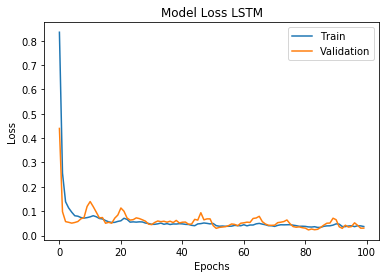

In [147]:
plt.plot(LSTM_History.history['loss'])
plt.plot(LSTM_History.history['val_loss'])
plt.title('Model Loss LSTM')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

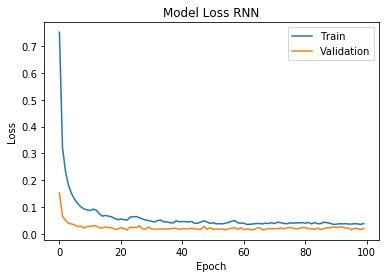

In [148]:
plt.plot(RNN_History.history['loss'])
plt.plot(RNN_History.history['val_loss'])
plt.title('Model Loss RNN')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

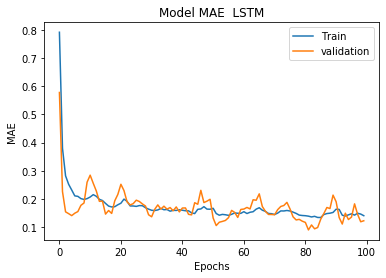

In [149]:
plt.plot(LSTM_History.history['mae'])
plt.plot(LSTM_History.history['val_mae'])
plt.title('Model MAE  LSTM')
plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.legend(['Train', 'validation'], loc='upper right')
plt.show()

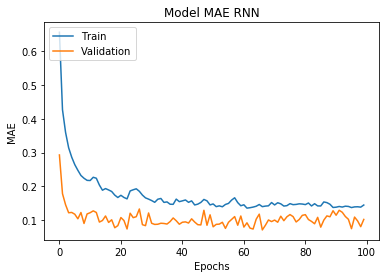

In [150]:
plt.plot(RNN_History.history['mae'])
plt.plot(RNN_History.history['val_mae'])
plt.title('Model MAE RNN')
plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Conclusion

1. For NABIL Bank LSTM and RNN Models used for Stock Price Prediction
2. The Error is Low for RNN Model